# Explore here

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

import warnings

In [31]:


# URL del archivo CSV
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"

# Cargar el DataFrame desde la URL
df = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame para verificar la carga
print(df.head())

# Mostrar información general del DataFrame
print(df.info())# Your code here

                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


In [32]:
df.describe()

,sales
count,366.000000
mean,524.963968
std,275.089698
min,53.803211
25%,290.186822
50%,520.699468
75%,763.289263
max,1000.482785


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [34]:
df.isnull().sum()

date     0
sales    0
dtype: int64

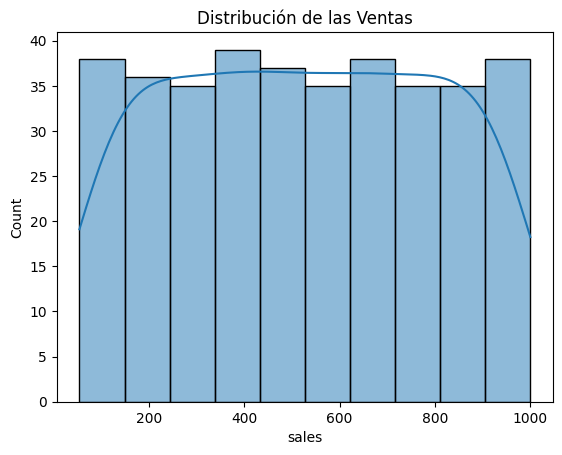

In [35]:
import seaborn as sns

sns.histplot(df['sales'], kde=True)
plt.title('Distribución de las Ventas')
plt.show()


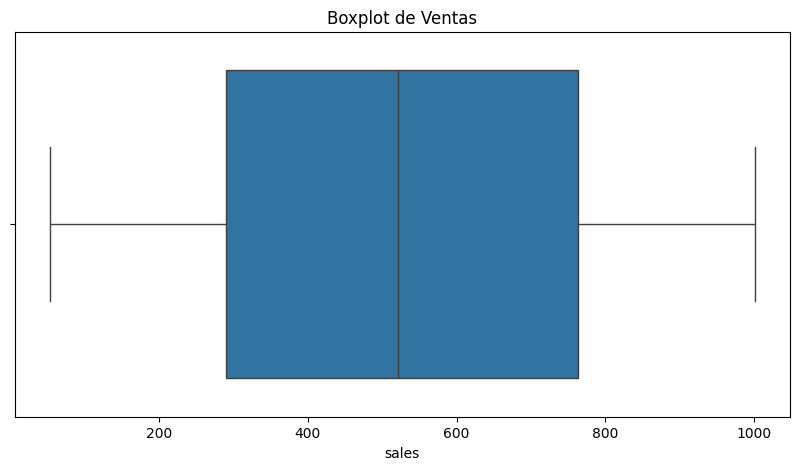

In [36]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x=df['sales'])
plt.title('Boxplot de Ventas')
plt.show()


In [37]:
print(df.index.duplicated().sum())

0


Convertimos la columna date en datetime para leerlo en formato de fecha. Si encuentra un valor no convertible, lo convierte en NaT (fecha nula) gracias al argumento errors='coerce'.



In [38]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

Comprobamos que datetime está correcto y sumamos los nulos.


In [39]:
print(df['date'].dtypes)            
print(df['date'].isnull().sum())   

datetime64[ns]
0


In [40]:
print(df.dtypes)

date     datetime64[ns]
sales           float64
dtype: object


Establecemos la columna 'date' como índice del DataFrame para trabajar la serie temporal correctamente.

In [41]:
df.set_index('date', inplace=True)

Extraemos el año y el mes del índice de fechas y los guardamos en nuevas columnas 'year' y 'month'.

In [42]:
df['year'] = df.index.year
df['month'] = df.index.month

Agrupamos las ventas por año, calculamos el promedio y lo grafica como un gráfico de barras.

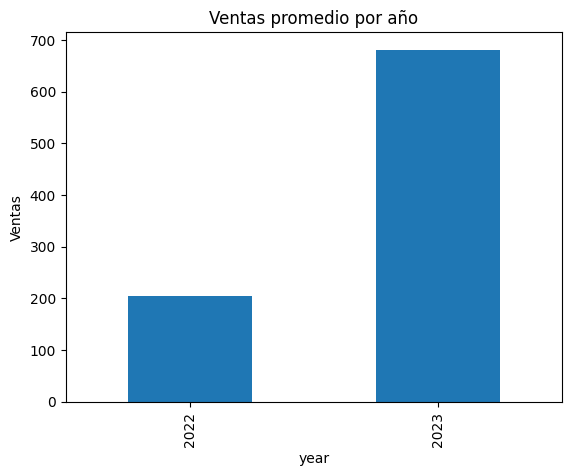

In [43]:
df.groupby('year')['sales'].mean().plot(kind='bar', title='Ventas promedio por año', ylabel='Ventas')
plt.show()

In [44]:
print(df.index.min(), df.index.max())

2022-09-03 17:10:08.079328 2023-09-03 17:10:08.079328


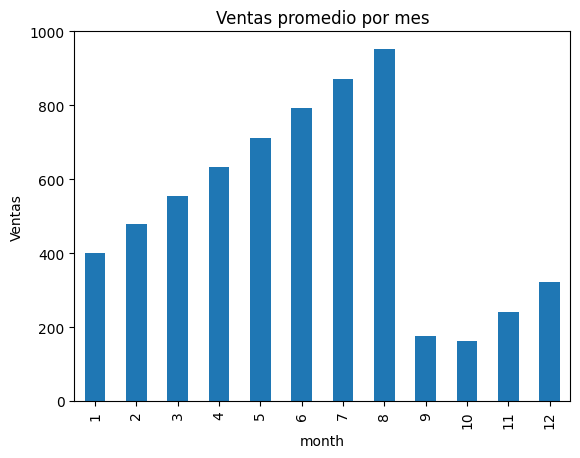

In [45]:
df.groupby('month')['sales'].mean().plot(kind='bar', title='Ventas promedio por mes', ylabel='Ventas')
plt.show()

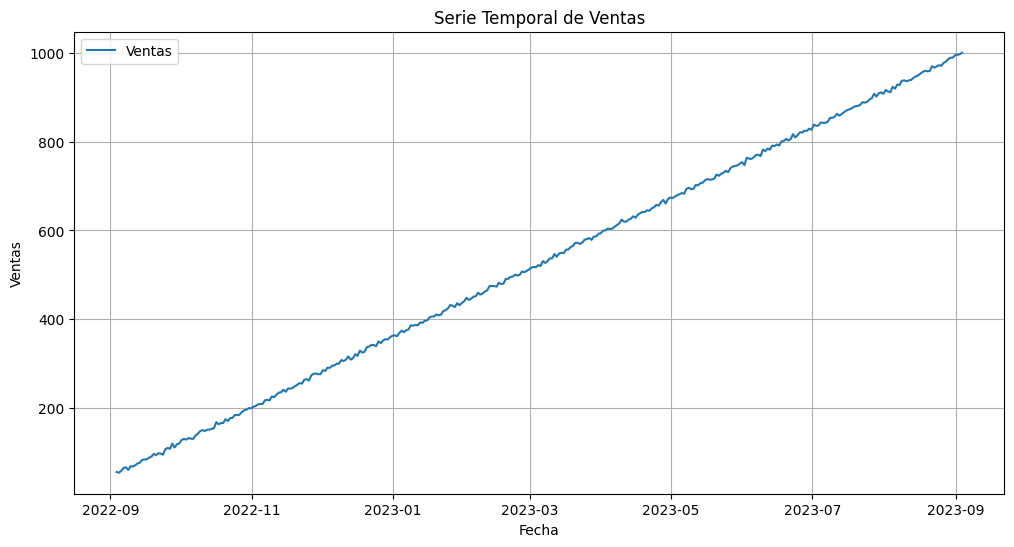

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['sales'], label='Ventas')
plt.title('Serie Temporal de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
print(pd.infer_freq(df.index))

D


In [48]:
df["date"] = pd.to_datetime(df[["year", "month"]].assign(day = 1))
df = df.set_index("date")
ts = df["sales"]
ts.head()

date
2022-09-01    55.292157
2022-09-01    53.803211
2022-09-01    58.141693
2022-09-01    64.530899
2022-09-01    66.013633
Name: sales, dtype: float64

Analizamos la tendencia y la serie temporal

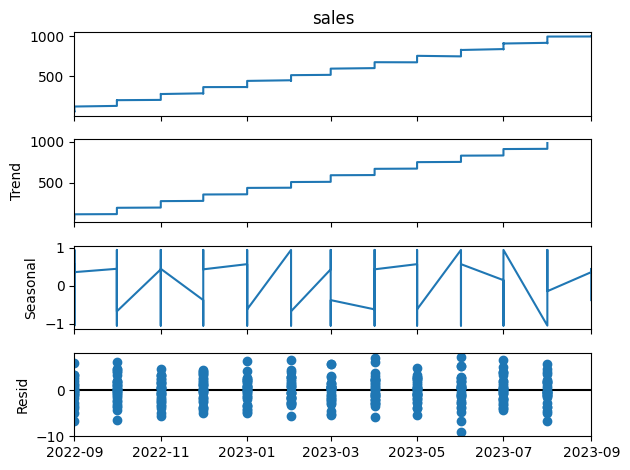

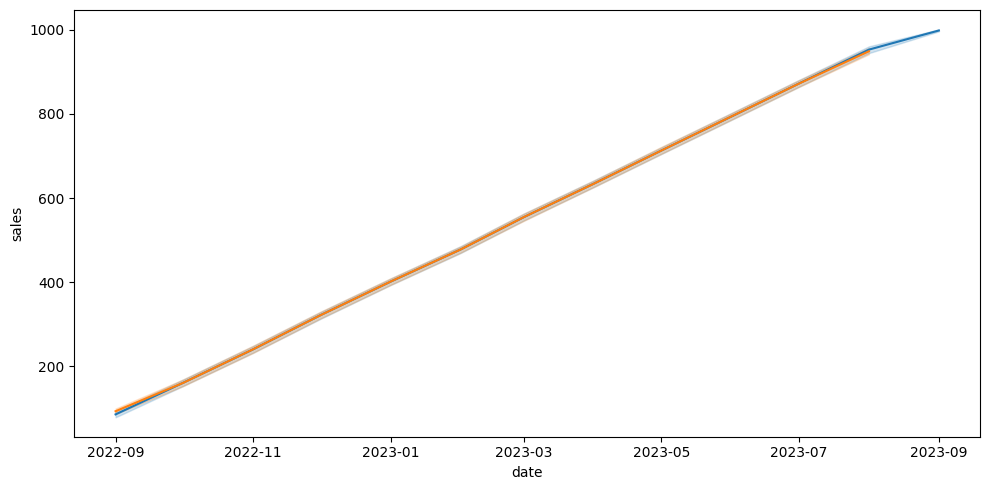

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['sales'], model='additive', period=12)

decomposition.plot()
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

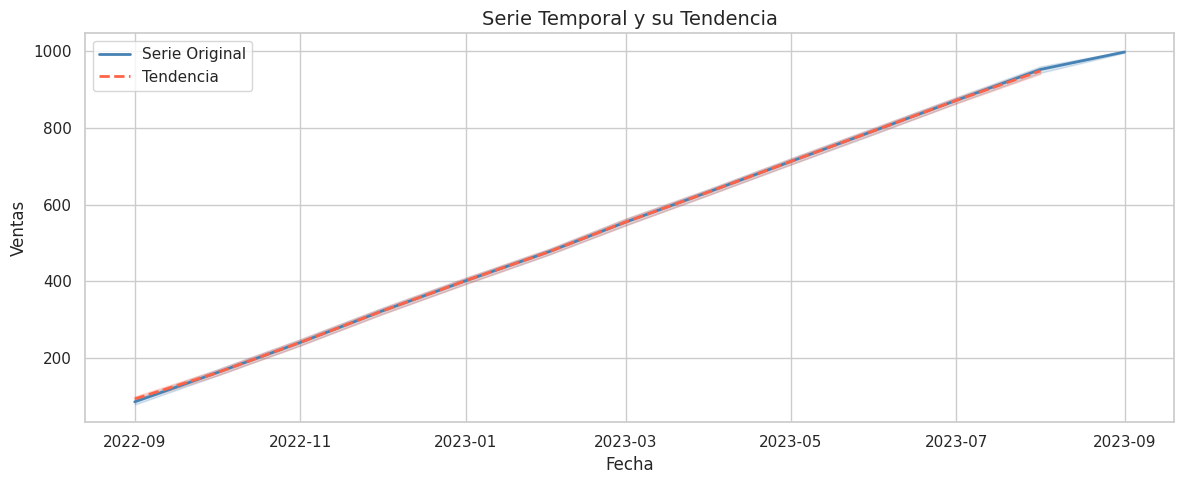

In [50]:
sns.set(style="whitegrid")

# Crear figura
fig, axis = plt.subplots(figsize=(12, 5))

# Serie original en azul suave
sns.lineplot(data=ts, label='Serie Original', color='steelblue', linewidth=2)

# Tendencia en rojo claro (si hay valores nulos, se interpolan visualmente)
sns.lineplot(data=trend, label='Tendencia', color='tomato', linewidth=2, linestyle='--')

# Títulos y leyenda
plt.title('Serie Temporal y su Tendencia', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()

plt.tight_layout()
plt.show()

<Axes: xlabel='date'>

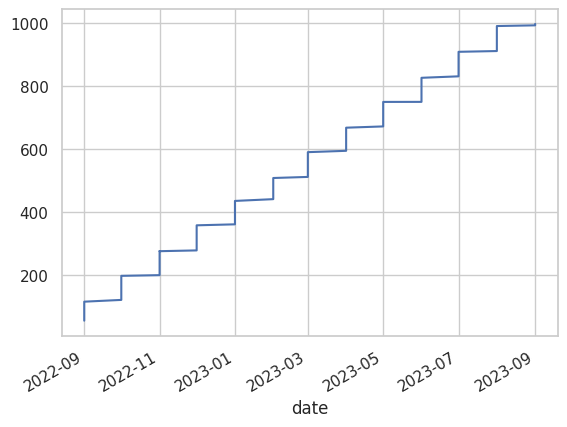

In [51]:
df['sales'].rolling(window=3).mean().plot(label='Tendencia suavizada')

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, period = 12)
decomposition

In [53]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.545414193706378
p-value: 0.9861899815311064


In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
df['date'] = pd.to_datetime(df['date'])  # Asegúrate de que sea tipo datetime
df.set_index('date', inplace=True)
decomposition = seasonal_decompose(df['sales'], model='additive')
decomposition.plot()
plt.show()


KeyError: 'date'

Entrenamiento ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Dividir en entrenamiento y prueba
train = df.iloc[:-12]
test = df.iloc[-12:]


In [ ]:
model = ARIMA(train['sales'], order=(1,1,1))
model_fit = model.fit()

# Resumen del modelo
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  354
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1019.081
Date:                Mon, 05 May 2025   AIC                           2044.161
Time:                        14:40:17   BIC                           2055.761
Sample:                    09-03-2022   HQIC                          2048.777
                         - 08-22-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    593.845      0.000       0.997       1.003
ma.L1         -0.9992      0.689     -1.451      0.147      -2.349       0.351
sigma2        18.5995     12.879      1.444      0.1

/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Predicción

In [ ]:
pred = model_fit.forecast(steps=12)
pred.index = test.index

In [ ]:
from pmdarima import auto_arima
forecast = model.predict(60)
forecast


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

Comparación visual

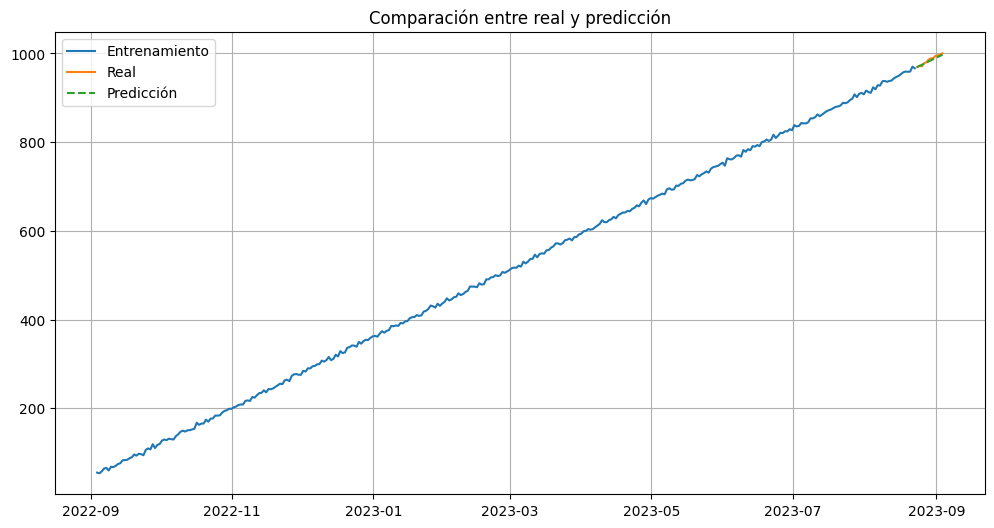

In [ ]:
# Comparar visualmente
plt.figure(figsize=(12,6))
plt.plot(train['sales'], label='Entrenamiento')
plt.plot(test['sales'], label='Real')
plt.plot(pred, label='Predicción', linestyle='--')
plt.legend()
plt.title('Comparación entre real y predicción')
plt.grid(True)
plt.show()

Medir error 

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test['sales'], pred)
print(f'MSE: {mse:.2f}')

MSE: 9.27


In [ ]:
import pickle
with open('modelo_arima.pkl', 'wb') as f:
    pickle.dump(model, f)